In [3]:
import requests 
import json

lat = "42.098701"
lon = "-75.912537"
genius = requests.get(f'https://api.weather.gov/points/{lat},{lon}')

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0987,-75.9125',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9125, 42.0987]},
 'properties': {'@id': 'https://api.weather.gov/p

In [4]:
forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json = new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-21T00:00:04+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T01:30:43+00:00',
  'updateTime': '2023-03-21T00:00:04+00:00',
  'validTimes': '2023-03-20T17:00:00+00:00/P7DT20H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-20T21:00:00-04:00',
    'endTime': '2023-03-21T06:00:00-04:00',
    'i

In [5]:
import csv
csv_file = open("weather", "w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Day", "Temperature", "Description"])

a = json["properties"]["periods"]
a

for i in a:
    day = i["name"]
    temp = i["temperature"]
    desc = i["detailedForecast"]
    
    csv_writer.writerow([day, temp, desc])
    
csv_file.close()

In [6]:
import pandas as pd

pd.read_csv("weather")

,Day,Temperature,Description
0,Tonight,30,A slight chance of snow showers after 5am. Par...
1,Tuesday,55,A slight chance of snow showers before 7am. Mo...
2,Tuesday Night,33,"Mostly cloudy, with a low around 33. Southeast..."
3,Wednesday,56,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,44,"A chance of rain showers. Mostly cloudy, with ..."
5,Thursday,60,"Rain showers likely. Cloudy, with a high near ..."
6,Thursday Night,38,"Rain showers likely. Cloudy, with a low around..."
7,Friday,47,"A chance of rain showers. Cloudy, with a high ..."
8,Friday Night,34,"A chance of rain before 1am, then a chance of ..."
9,Saturday,44,"Rain and snow likely. Mostly cloudy, with a hi..."


<function matplotlib.pyplot.show(close=None, block=None)>

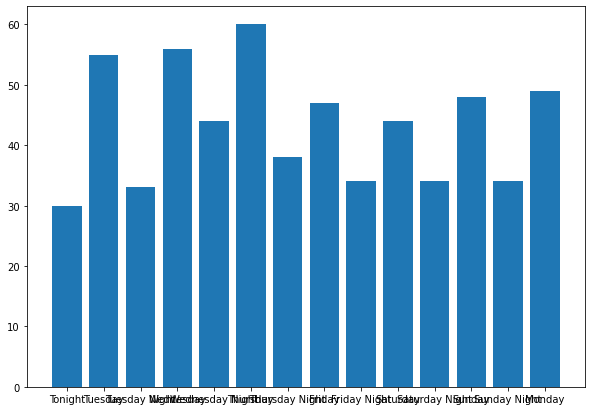

In [7]:
from matplotlib import pyplot as plt
import numpy as np
df = pd.DataFrame(pd.read_csv("weather"))

day = df["Day"]
temp = df["Temperature"]

fig = plt.figure(figsize = (10,7))
plt.bar(day[0:14], temp[0:14])

plt.show

In [8]:
countries = requests.get('https://date.nager.at/api/v3/CountryInfo/235')
countries.json()

{'commonName': 'United States',
 'officialName': 'United States of America',
 'countryCode': 'US',
 'region': 'Americas',
 'borders': [{'commonName': 'Canada',
   'officialName': 'Canada',
   'countryCode': 'CA',
   'region': 'Americas',
   'borders': None},
  {'commonName': 'Mexico',
   'officialName': 'United Mexican States',
   'countryCode': 'MX',
   'region': 'Americas',
   'borders': None}]}

In [9]:
available_countries = requests.get('https://date.nager.at/api/v3/AvailableCountries')
available_countries.json()

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [10]:
long_weekends = requests.get('https://date.nager.at/api/v3/LongWeekend/2023/235')
long_weekends.json()

[{'startDate': '2023-01-06',
  'endDate': '2023-01-08',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-03-11',
  'endDate': '2023-03-13',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-04-08',
  'endDate': '2023-04-10',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-04-29',
  'endDate': '2023-05-01',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-06-29',
  'endDate': '2023-07-02',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-08-12',
  'endDate': '2023-08-15',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-09-08',
  'endDate': '2023-09-10',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-12-08',
  'endDate': '2023-12-10',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-12-23',
  'endDate': '2023-12-26',
  'dayCount': 4,
  'needBridgeDay': False}]

In [11]:
get_public_holidays = requests.get('https://date.nager.at/api/v3/PublicHolidays/2023/235')
get_public_holidays.json()

[{'date': '2023-01-01',
  'localName': 'Maria Santissima Madre di Dio',
  'name': 'Solemnity of Mary, Mother of God',
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-01-06',
  'localName': 'Epifania del Signore',
  'name': 'Epiphany',
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-11',
  'localName': 'Anniversario della istituzione dello Stato della Città del Vaticano',
  'name': 'Anniversary of the foundation of Vatican City',
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-13',
  'localName': "Anniversario dell'Elezione del Santo Padre",
  'name': 'Anniversary of the election of Pope Francis',
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['P

In [12]:
is_today_a_public_holiday = requests.get('https://date.nager.at/api/v3/IsTodayPublicHoliday/US?offset=0')
is_today_a_public_holiday

<Response [204]>

In [13]:
public_holiday_365 = requests.get('https://date.nager.at/api/v3/NextPublicHolidays/235')
public_holiday_365.json()

[{'date': '2023-04-10',
  'localName': "Lunedì dell'Angelo",
  'name': 'Easter Monday',
  'countryCode': 'VA',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-23',
  'localName': 'Onomastico del Santo Padre',
  'name': 'Saint George',
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-01',
  'localName': 'San Giuseppe lavoratore',
  'name': 'Saint Joseph the Worker',
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-06-29',
  'localName': 'Santi Pietro e Paolo',
  'name': 'Saints Peter and Paul',
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-08-15',
  'localName': 'Assunzione di Maria in Cielo',
  'name': 'Assumption Day',
  'countryCode': 'VA

In [14]:
public_holiday_week = requests.get('https://date.nager.at/api/v3/NextPublicHolidaysWorldwide')
public_holiday_week.json()

[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

In [15]:
def get_public_holidays(country_code):
    url = f"https://date.nager.at/api/v3/publicholidays/2023/{country_code}"
    response = requests.get(url)
    
    if response.status_code == 200: #Reflective of the HTTP response status. Anything other than 200 = code is executed and the data is requested but if HTTP does not equal 200 then that means that there is no data on that country so it returns an empty list, this fixes the error where countries had no holiday data.
        return response.json()
    else:
        return []
    
def main():
    country_codes = ["US", "UA", "MKD", "FR", "GB", "AU", "BR", "ALB", "JP", "RO"]
    total_holidays = 0
    
    for x in country_codes:
        holidays = get_public_holidays(x)
        if holidays:
            num_holidays = len(holidays)
            print(f"{x}: {num_holidays} public holidays.")
            total_holidays += num_holidays
        else:
            print(f"{x}: No public holiday information available.")
            
        print(f"Total number of public holidays: {total_holidays}")
main()

US: 13 public holidays.
Total number of public holidays: 13
UA: 11 public holidays.
Total number of public holidays: 24
MKD: No public holiday information available.
Total number of public holidays: 24
FR: 11 public holidays.
Total number of public holidays: 35
GB: 16 public holidays.
Total number of public holidays: 51
AU: 21 public holidays.
Total number of public holidays: 72
BR: 14 public holidays.
Total number of public holidays: 86
ALB: No public holiday information available.
Total number of public holidays: 86
JP: 16 public holidays.
Total number of public holidays: 102
RO: 15 public holidays.
Total number of public holidays: 117
